# Convolution Neural Network

1. Train
2. Evaluate
3. Visualize Accuracy & Lost
4. Re-evaluate Model
5. Make Predictions on the Test Set
6. Visualize classification report


In [93]:
## Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
import pandas as pd
from PIL import Image 
from PIL.ImageDraw import Draw

In [94]:
# Define Classes
classes = ['Transformer','No-Transformer']

In [96]:
# Read in Training Data and specify image directory location in system
TRAINING_CSV_FILE = 'Data/training_data2.csv'
TRAINING_IMAGE_DIR = 'Images/Training'

training_image_records = pd.read_csv(TRAINING_CSV_FILE)

train_image_path = TRAINING_IMAGE_DIR

# Initiate variables / arrays
train_images = []
train_targets = []
train_labels = []

# Iterrate through rows in the csv file
for index, row in training_image_records.iterrows():
    
    # Define a row to include the following headers from the csv
    (filename, width, height, class_name, xmin, ymin, xmax, ymax) = row
    # Specify training image path (Create string) - joining the filename in csv and the path
    train_image_fullpath = os.path.join(train_image_path, filename)
    # Load the image
    train_img = keras.preprocessing.image.load_img(train_image_fullpath, target_size=(height, width))
    # Create an array of the image
    train_img_arr = keras.preprocessing.image.img_to_array(train_img)
    
    # Define xmin, ymin, xmax, and ymax
    xmin = round(xmin/ width, 2)
    ymin = round(ymin/ height, 2)
    xmax = round(xmax/ width, 2)
    ymax = round(ymax/ height, 2)
    
    # Append this information in their respective arrays initiated for the 'For' loop
    train_images.append(train_img_arr)
    train_targets.append((xmin, ymin, xmax, ymax))
    train_labels.append(classes.index(class_name))

In [97]:
# Repeat process as described above but with TEST CSV and images
TEST_CSV_FILE = 'Data/test_data2.csv'
TEST_IMAGE_DIR = 'Images/Test'

test_image_records = pd.read_csv(TEST_CSV_FILE)

test_image_path = TEST_IMAGE_DIR

test_images = []
test_targets = []
test_labels = []

for index, row in test_image_records.iterrows():

    (filename, width, height, class_name, xmin, ymin, xmax, ymax) = row

    test_image_fullpath = os.path.join(test_image_path, filename)
    test_img = keras.preprocessing.image.load_img(test_image_fullpath, target_size=(height, width))
    test_img_arr = keras.preprocessing.image.img_to_array(test_img)


    xmin = round(xmin/ width, 2)
    ymin = round(ymin/ height, 2)
    xmax = round(xmax/ width, 2)
    ymax = round(ymax/ height, 2)

    test_images.append(test_img_arr)
    test_targets.append((xmin, ymin, xmax, ymax))
    test_labels.append(classes.index(class_name))

In [98]:
# Redefine appended arraya to np.arrays
train_images = np.array(train_images)
train_targets = np.array(train_targets)
train_labels = np.array(train_labels)

test_images = np.array(test_images)
test_targets = np.array(test_targets)
test_labels = np.array(test_labels)

In [99]:
# Specifying width and height of images & number of classes in this classification
width = 518
height = 388
num_classes = 2


In [100]:
# Specified convolution layers
#create the common input layer
input_shape = (height, width, 3)
input_layer = tf.keras.layers.Input(input_shape)

#create the base layers
base_layers = layers.experimental.preprocessing.Rescaling(1./255, name='bl_1')(input_layer)
base_layers = layers.Conv2D(16, 3, padding='same', activation='relu', name='bl_2')(base_layers)
base_layers = layers.MaxPooling2D(name='bl_3')(base_layers)
base_layers = layers.Conv2D(32, 3, padding='same', activation='relu', name='bl_4')(base_layers)
base_layers = layers.MaxPooling2D(name='bl_5')(base_layers)
base_layers = layers.Conv2D(64, 3, padding='same', activation='relu', name='bl_6')(base_layers)
base_layers = layers.MaxPooling2D(name='bl_7')(base_layers)
base_layers = layers.Flatten(name='bl_8')(base_layers)

In [101]:
#create the classifier branch
classifier_branch = layers.Dense(128, activation='relu', name='cl_1')(base_layers)
classifier_branch = layers.Dense(num_classes, name='cl_head')(classifier_branch)  

In [102]:
locator_branch = layers.Dense(128, activation='relu', name='bb_1')(base_layers)
locator_branch = layers.Dense(64, activation='relu', name='bb_2')(locator_branch)
locator_branch = layers.Dense(32, activation='relu', name='bb_3')(locator_branch)
locator_branch = layers.Dense(4, activation='sigmoid', name='bb_head')(locator_branch)

In [103]:
model = tf.keras.Model(input_layer,
           outputs=[classifier_branch,locator_branch])

In [104]:
losses = {"cl_head":tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
   "bb_head":tf.keras.losses.MSE}

In [105]:
model.compile(loss=losses, optimizer='Adam', metrics=['accuracy',Precision(),Recall()])

In [106]:
trainTargets = {
    "cl_head": train_labels,
    "bb_head": train_targets
}
testTargets = {
    "cl_head": test_labels,
    "bb_head": test_targets
}

In [107]:
training_epochs = 5

history = model.fit(train_images, trainTargets,
            validation_data=(test_images, testTargets),
             batch_size=32,
             epochs=training_epochs,
             shuffle=True,
             verbose=1)

Epoch 1/5


ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/engine/training.py", line 817, in train_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 460, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/utils/metrics_utils.py", line 73, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/metrics.py", line 177, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/metrics.py", line 1399, in update_state  **
        return metrics_utils.update_confusion_matrix_variables(
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/utils/metrics_utils.py", line 625, in update_confusion_matrix_variables
        y_pred.shape.assert_is_compatible_with(y_true.shape)

    ValueError: Shapes (None, 2) and (None, 1) are incompatible


In [64]:
score = model.fit(test_images, testTargets,batch_size=4)

25/25 [==============================] - 13s 504ms/step - loss: 0.2393 - cl_head_loss: 0.2061 - bb_head_loss: 0.0332 - cl_head_accuracy: 0.9300 - bb_head_accuracy: 0.2100


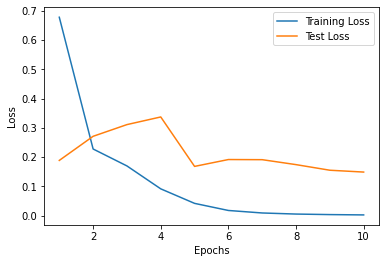

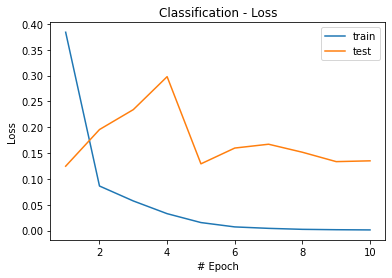

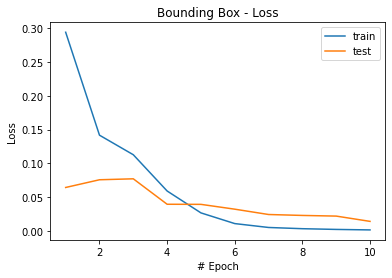

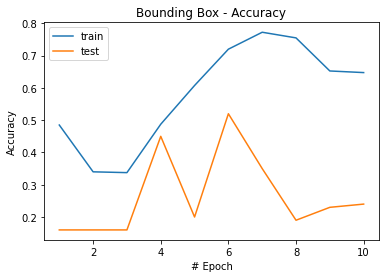

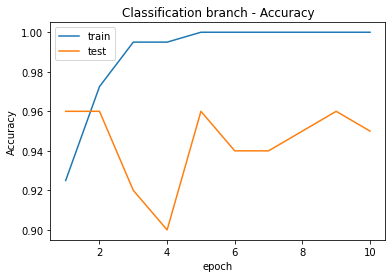

In [68]:
loss_values = history.history['loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, label='training Loss')
plt.plot(epochs, history.history['val_loss'], label='test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.figure()
plt.plot(epochs,history.history['cl_head_loss'], label='train')
plt.plot(epochs,history.history['val_cl_head_loss'], label='test')
plt.title('Classification - Loss')
plt.ylabel('Loss')
plt.xlabel('# Epoch')
plt.legend()


plt.figure()
plt.plot(epochs,history.history['bb_head_loss'],label='train')
plt.plot(epochs,history.history['val_bb_head_loss'],label='test')
plt.title('Bounding Box - Loss')
plt.ylabel('Loss')
plt.xlabel('# Epoch')
plt.legend()


plt.figure()
plt.plot(epochs,history.history['bb_head_accuracy'], label='train')
plt.plot(epochs,history.history['val_bb_head_accuracy'], label='test')
plt.title('Bounding Box - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('# Epoch')
plt.legend()

plt.figure()
plt.plot(epochs,history.history['cl_head_accuracy'], label='train')
plt.plot(epochs,history.history['val_cl_head_accuracy'], label='test')
plt.title('Classification branch - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend()



In [34]:
print(history.history)

{'loss': [0.21497078239917755, 0.07835038751363754, 0.033377062529325485, 0.017645766958594322, 0.00885105226188898, 0.005853312090039253, 0.003557657590135932, 0.0024085547775030136, 0.002038089092820883, 0.0016067364485934377], 'cl_head_loss': [0.18797485530376434, 0.06629958003759384, 0.026409849524497986, 0.013279641978442669, 0.006136608310043812, 0.00391351105645299, 0.002243471797555685, 0.0014933289494365454, 0.001037372974678874, 0.0007013005088083446], 'bb_head_loss': [0.026995915919542313, 0.012050802819430828, 0.00696721812710166, 0.004366124514490366, 0.0027144441846758127, 0.0019397999858483672, 0.0013141860254108906, 0.0009152254206128418, 0.0010007162345573306, 0.000905435997992754], 'cl_head_accuracy': [0.9300000071525574, 0.987500011920929, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'bb_head_accuracy': [0.4050000011920929, 0.49000000953674316, 0.4724999964237213, 0.5199999809265137, 0.5450000166893005, 0.5674999952316284, 0.5375000238418579, 0.5274999737739563, 0.545000

In [37]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 388, 518, 3  0           []                               
                                )]                                                                
                                                                                                  
 bl_1 (Rescaling)               (None, 388, 518, 3)  0           ['input_1[0][0]']                
                                                                                                  
 bl_2 (Conv2D)                  (None, 388, 518, 16  448         ['bl_1[0][0]']                   
                                )                                                                 
                                                                                              

In [56]:
## Another approach 

training_epochs = 10

history = model.fit(train_images, trainTargets['cl_head'],
             batch_size=32,
             epochs=training_epochs,
             shuffle=True,
             verbose=1)
            

Epoch 1/10
13/13 [==============================] - 35s 3s/step - loss: 0.4620 - cl_head_loss: 0.0361 - bb_head_loss: 0.4259 - cl_head_accuracy: 0.9875 - bb_head_accuracy: 0.4175
Epoch 2/10
13/13 [==============================] - 29s 2s/step - loss: 0.3007 - cl_head_loss: 0.0120 - bb_head_loss: 0.2887 - cl_head_accuracy: 0.9975 - bb_head_accuracy: 0.3400
Epoch 3/10
13/13 [==============================] - 30s 2s/step - loss: 0.2091 - cl_head_loss: 0.0079 - bb_head_loss: 0.2013 - cl_head_accuracy: 1.0000 - bb_head_accuracy: 0.1725
Epoch 4/10
13/13 [==============================] - 29s 2s/step - loss: 0.0673 - cl_head_loss: 0.0037 - bb_head_loss: 0.0636 - cl_head_accuracy: 1.0000 - bb_head_accuracy: 0.4175
Epoch 5/10
13/13 [==============================] - 32s 2s/step - loss: 0.0103 - cl_head_loss: 0.0012 - bb_head_loss: 0.0092 - cl_head_accuracy: 1.0000 - bb_head_accuracy: 0.6050
Epoch 6/10
13/13 [==============================] - 32s 2s/step - loss: 0.0022 - cl_head_loss: 5.1207e-04

In [69]:

predictions = model.predict(test_images,batch_size=32)

print(predictions)

[array([[ 3.5690536 , -2.3611336 ],
       [ 0.6971662 ,  0.12091504],
       [-0.41210794,  0.44694567],
       [-0.36978367,  0.26577228],
       [ 5.3071637 , -3.1441717 ],
       [-0.46736628,  0.4521068 ],
       [ 0.07738041,  0.4963448 ],
       [-0.57673603,  1.1992995 ],
       [ 0.0673155 ,  0.3404224 ],
       [-0.8837748 ,  1.2851909 ],
       [-0.327783  ,  0.40307358],
       [-0.36011726,  0.7426988 ],
       [ 4.913563  , -2.9676638 ],
       [-1.1594914 ,  1.0723542 ],
       [-0.62796324,  0.67400897],
       [-0.55823475,  0.5681137 ],
       [-1.349027  ,  1.2862668 ],
       [-1.1446687 ,  1.2954928 ],
       [ 7.9789343 , -5.44002   ],
       [-0.9937822 ,  0.74288553],
       [ 1.5544882 , -0.5692673 ],
       [ 3.2639332 , -2.4593096 ],
       [ 1.1424276 , -0.88709193],
       [ 6.187108  , -3.9070492 ],
       [ 2.8013365 , -2.236531  ],
       [-1.0784631 ,  0.9057611 ],
       [-0.6808024 ,  0.67916006],
       [ 3.1727605 , -2.3042784 ],
       [-0.92729217

In [79]:
print(testTargets['cl_head'])
len(testTargets['cl_head'])


[0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1]


In [80]:
conf_matrix = tf.math.confusion_matrix(labels=testTargets['cl_head'],
                                       predictions=pd)

InvalidArgumentError: `predictions` contains negative values.  
Condition x >= 0 did not hold element-wise:
x (shape=(100, 2) dtype=int64) = 
['3', '-2', '0', '...']

In [61]:
matrix = metrics.confusion_matrix(testTargets.argmax(axis=1), predictions.argmax(axis=1))


AttributeError: 'dict' object has no attribute 'argmax'

In [62]:
import sklearn
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(testTargets,predictions))
print("Precision:",metrics.precision_score(testTargets,predictions))
print("Recall:",metrics.recall_score(testTargets,predictions))

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(testTargets, predictions)
cnf_matrix




ValueError: Expected array-like (array or non-string sequence), got {'cl_head': array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 'bb_head': array([[0.37, 0.4 , 0.55, 0.63],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.43, 0.53, 0.61, 0.9 ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.27, 0.24, 0.52, 0.66],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.48, 0.2 , 0.67, 0.56],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.4 , 0.56, 0.68, 0.92],
       [0.33, 0.7 , 0.57, 1.  ],
       [0.25, 0.7 , 0.49, 1.  ],
       [0.43, 0.15, 0.69, 0.6 ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.47, 0.38, 0.73, 0.84],
       [0.  , 0.  , 0.  , 0.  ],
       [0.36, 0.05, 0.82, 0.8 ],
       [0.32, 0.3 , 0.59, 0.76],
       [0.29, 0.  , 0.56, 0.2 ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.34, 0.12, 0.64, 0.69],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.27, 0.57, 0.53, 0.96],
       [0.21, 0.05, 0.46, 0.48],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.39, 0.41, 0.56, 0.76],
       [0.  , 0.  , 0.  , 0.  ],
       [0.57, 0.42, 0.76, 0.76],
       [0.  , 0.  , 0.  , 0.  ],
       [0.59, 0.  , 0.78, 0.24],
       [0.32, 0.17, 0.56, 0.6 ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.36, 0.13, 0.66, 0.7 ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.36, 0.52, 0.55, 0.84],
       [0.  , 0.  , 0.  , 0.  ],
       [0.31, 0.27, 0.61, 0.81],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ]])}

In [ ]:
import seaborn as sns
class_names=['Transformer','No Transformer']
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="icefire",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
matrix = metrics.confusion_matrix(testTargets.argmax(axis=1), predictions.argmax(axis=1))

In [86]:
from keras.metrics import Precision, Recall

model.compile(loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

print(Precision)
print(Recall)

None
<class 'keras.metrics.Precision'>
<class 'keras.metrics.Recall'>


In [89]:
m =  tf.keras.metrics.Precision()
m.model
print(m)

Precision(name=precision_5,dtype=float32,thresholds=None,top_k=None,class_id=None)
